In [1]:
%matplotlib inline
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import math

TIC = 'TIC 179715231'

In [2]:
search_ffi = lk.search_tesscut(TIC)

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 11,2019,TESScut,1426,TIC 179715231,0.0
1,TESS Sector 38,2021,TESScut,475,TIC 179715231,0.0


In [4]:
search_tpf = lk.search_targetpixelfile(TIC)

In [5]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 11,2019,TESS-SPOC,1800,179715231,0.0


In [6]:
search_lcf = lk.search_lightcurve(TIC)

In [7]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 11,2019,TESS-SPOC,1800,179715231,0.0
1,TESS Sector 11,2019,QLP,1800,179715231,0.0
2,TESS Sector 38,2021,QLP,600,179715231,0.0


In [8]:
search_lcf_refined = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=1800)

In [9]:
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 11,2019,TESS-SPOC,1800,179715231,0.0


In [10]:
lcf = search_lcf_refined.download_all()

In [11]:
lcf

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 179715231" SECTOR=11 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [12]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1596.8077736115333,———,———,5.2234535e-03,17728,1898.39196,1307.35493,1.5816086e+03,2.1375258e+00,3.3466941e+03,8.2522845e-01,———,———,11000000000000,———,———,———,———,1898.39196,6.4391032e-04,1307.35493,6.4746843e-04,-9.9972240e-04,-6.4216308e-02
1596.8286072046967,———,———,5.2237222e-03,17729,1898.39351,1307.35309,1.5846284e+03,2.1664360e+00,3.4717239e+03,8.3960444e-01,———,———,11000000000000,———,———,———,———,1898.39351,6.5112259e-04,1307.35309,6.5533584e-04,-1.0099963e-03,-6.5943897e-02
1596.8494407987914,———,———,5.2239918e-03,17730,1898.39249,1307.35302,1.5795731e+03,2.1914175e+00,3.5903862e+03,8.5327250e-01,———,———,11000000000000,———,———,———,———,1898.39249,6.6073495e-04,1307.35302,6.6500343e-04,-1.1165034e-03,-6.7289054e-02
1596.8702743947495,———,———,5.2242633e-03,17731,1898.39207,1307.35207,1.5830973e+03,2.2136981e+00,3.6948899e+03,8.6438352e-01,———,———,11000000000000,———,———,———,———,1898.39207,6.6583959e-04,1307.35207,6.7046186e-04,-1.5632325e-03,-6.8518698e-02
1596.8911079916375,———,———,5.2245357e-03,17732,1898.39069,1307.35214,1.5811332e+03,2.2332063e+00,3.7897981e+03,8.7444413e-01,———,———,11000000000000,———,———,———,———,1898.39069,6.7260792e-04,1307.35214,6.7723339e-04,-4.6258983e-03,-6.8302609e-02
1596.9119415899231,———,———,5.2248095e-03,17733,1898.38935,1307.34990,1.5796807e+03,2.2530992e+00,3.8839670e+03,8.8517386e-01,———,———,11000000000000,———,———,———,———,1898.38935,6.7925960e-04,1307.34990,6.8426062e-04,-5.6594722e-03,-7.0308350e-02
1596.9327751896064,———,———,5.2250847e-03,17734,1898.38822,1307.35190,1.5812424e+03,2.2696631e+00,3.9599922e+03,8.9241815e-01,———,———,11000000000000,———,———,———,———,1898.38822,6.8391999e-04,1307.35190,6.8837771e-04,-7.7088745e-03,-7.0053332e-02
1596.9536087906868,———,———,5.2253613e-03,17735,1898.38705,1307.35009,1.5780540e+03,2.2805529e+00,4.0144683e+03,8.9856696e-01,———,———,11000000000000,———,———,———,———,1898.38705,6.8852119e-04,1307.35009,6.9340249e-04,-1.0088137e-02,-7.1968921e-02


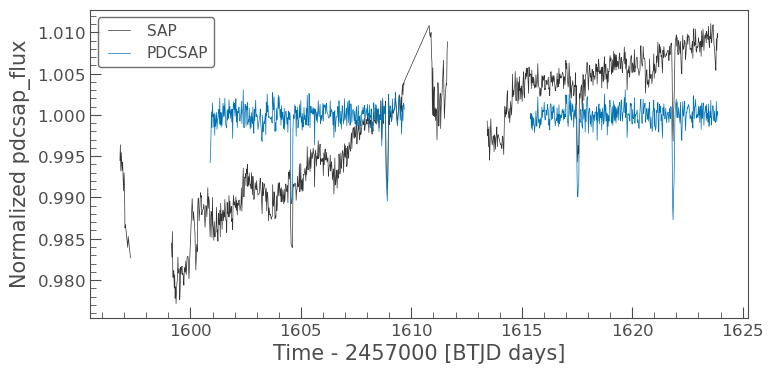

In [13]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

Text(0.5, 1.0, 'PDCSAP light curve of TIC 156002449')

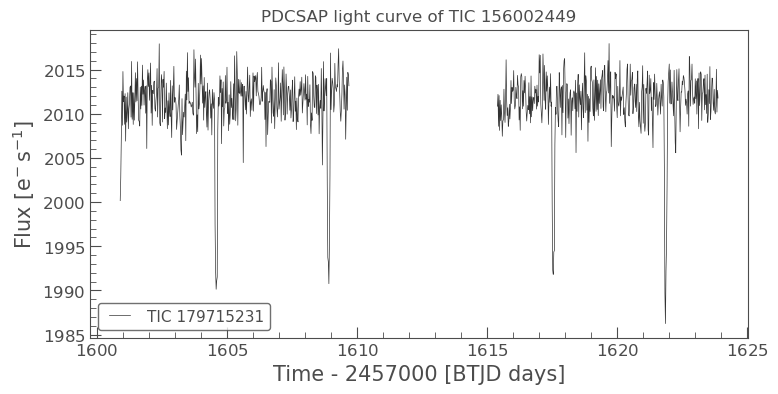

In [14]:
ax = lcf[0].plot() 
ax.set_title("PDCSAP light curve of TIC 179715231")

In [15]:
flat_lc = lcf[0].flatten(window_length=401)
folded_lc = flat_lc.fold(period=4.322631226312263486)
binned_lc = folded_lc.bin(time_bin_size=0.01)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

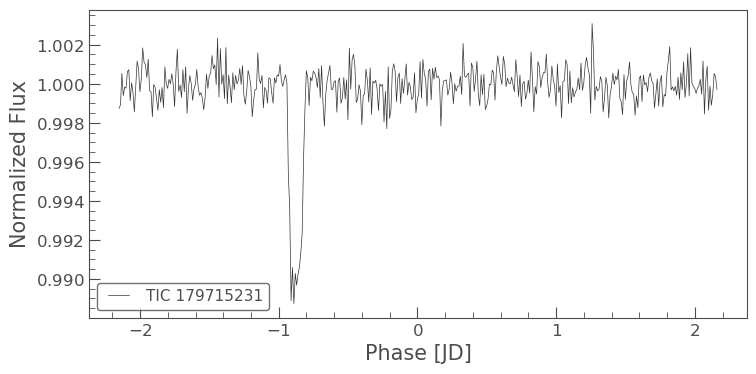

In [16]:
lcf[0].flatten(window_length=401).fold(period=4.322631226312263486).bin(time_bin_size=0.01).plot()

In [17]:
lcf[0].interact_bls()

In [18]:
ffi_data = search_ffi[1].download(cutout_size=10)

<AxesSubplot:title={'center':'Target ID: TIC 179715231, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

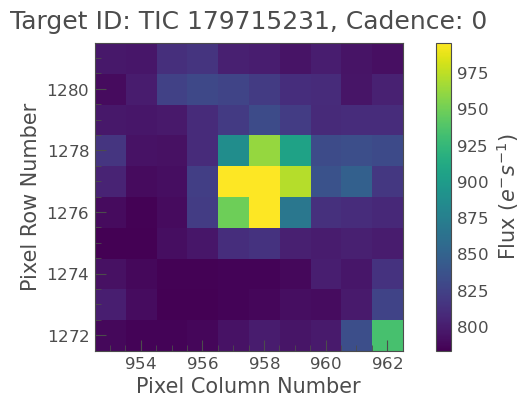

In [19]:
ffi_data.plot()

In [20]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

2

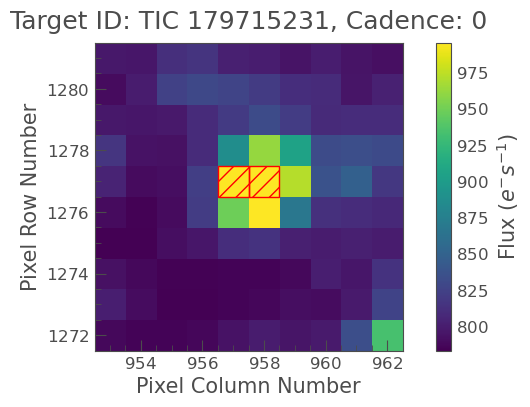

In [21]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [22]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [23]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
2333.8630681786353,2499.8486328125,2.405386209487915,957.5714185819844,1276.9999376427088,0,2048
2333.8700126623708,2465.3154296875,2.389101028442383,957.5728892806962,1276.9999367692315,1,2048
2333.8769571456405,2438.231689453125,2.3760650157928467,957.5734315830875,1277.0,2,2048
2333.883901629376,2421.18017578125,2.3675951957702637,957.5733376732882,1277.0,3,2048
2333.89084611311,2424.5859375,2.3691439628601074,957.5749331594957,1276.9999357070474,4,2048
2333.897790596846,2462.669921875,2.3874363899230957,957.573686619023,1277.0000632986937,5,2048
2333.904735080582,2533.05810546875,2.420011520385742,957.5709661385781,1276.9999384602395,6,2048
2333.9116795647824,2653.82958984375,2.4766430854797363,957.5678728760747,1277.0,7,2048


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

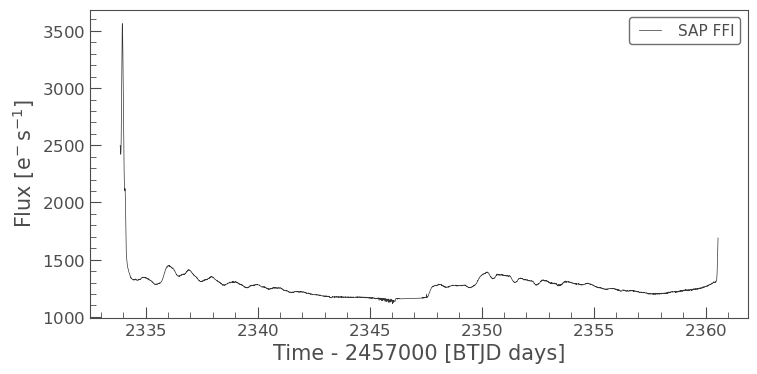

In [24]:
ffi_lc.plot(label="SAP FFI")

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

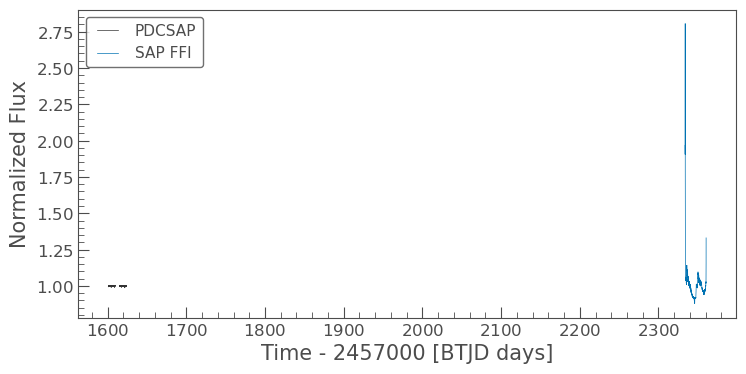

In [25]:
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP");
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [26]:
ffi_data.interact()
ffi_data.interact_sky()

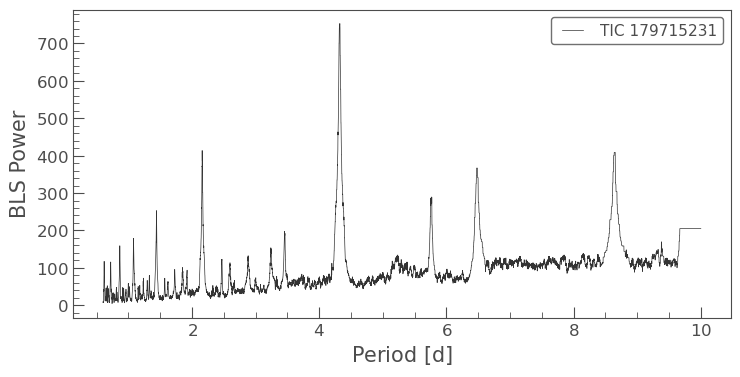

In [27]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.6, 10, 0.001))
periodogram.plot();

In [28]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}' .format(best_fit_period))

Best fit period: 4.322 d


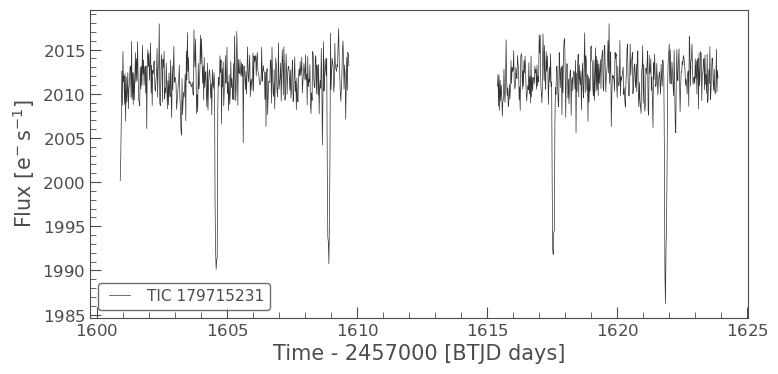

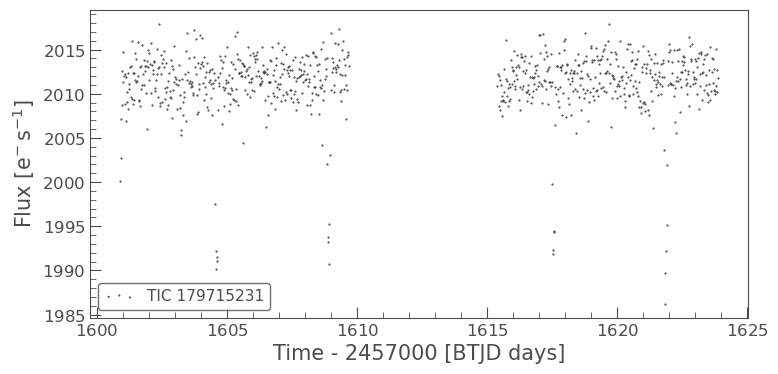

In [29]:
mask = ((lcf[0].time.value < 1625)&(lcf[0].time.value > 1600))
masked_lc=lcf[0][mask];
masked_lc.plot();
masked_lc.scatter(s=1);

In [30]:
# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 100000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

(0.0, 744.300308)

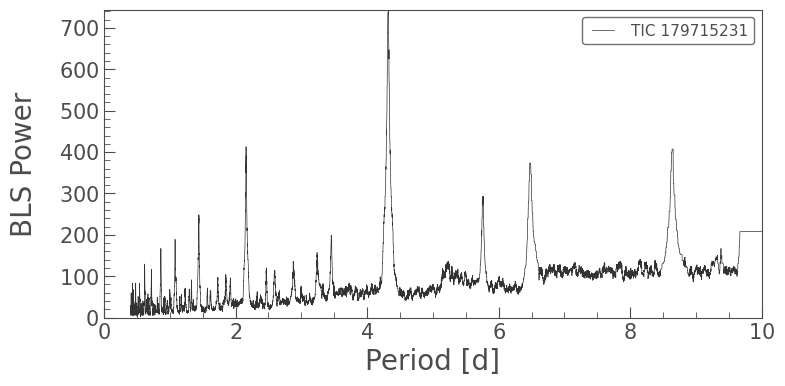

In [31]:
# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 10)
plt.ylim([0, 744.300308])

In [32]:
# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

In [33]:
# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(9):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')

Period at 1th max power = 4.322631226312263486 d
BLS max power = 744.300308
Epoch max power = 2458604.576167
----------------------------------------
Period at 2th max power = 4.322335223352234301 d
BLS max power = 744.300308
Epoch max power = 2458604.576167
----------------------------------------
Period at 3th max power = 4.322039220392204228 d
BLS max power = 744.300308
Epoch max power = 2458604.576167
----------------------------------------
Period at 4th max power = 4.322927229272293559 d
BLS max power = 744.300308
Epoch max power = 2458604.571167
----------------------------------------
Period at 5th max power = 4.324407244072441259 d
BLS max power = 744.300308
Epoch max power = 2458604.571167
----------------------------------------
Period at 6th max power = 4.324703247032470443 d
BLS max power = 744.300308
Epoch max power = 2458604.571167
----------------------------------------
Period at 7th max power = 4.321743217432175044 d
BLS max power = 744.300308
Epoch max power = 245860

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(1980.0, 2020.0)

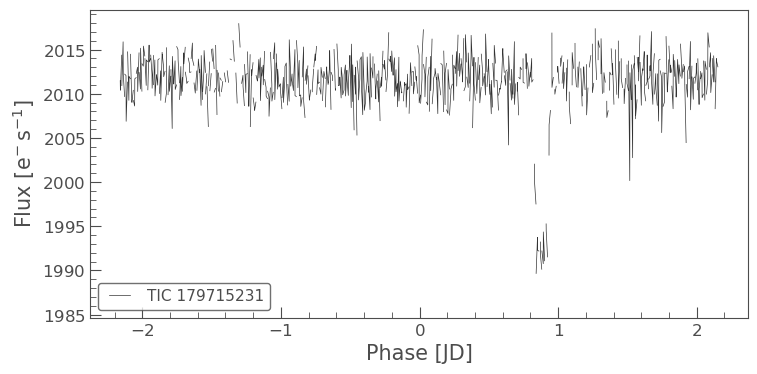

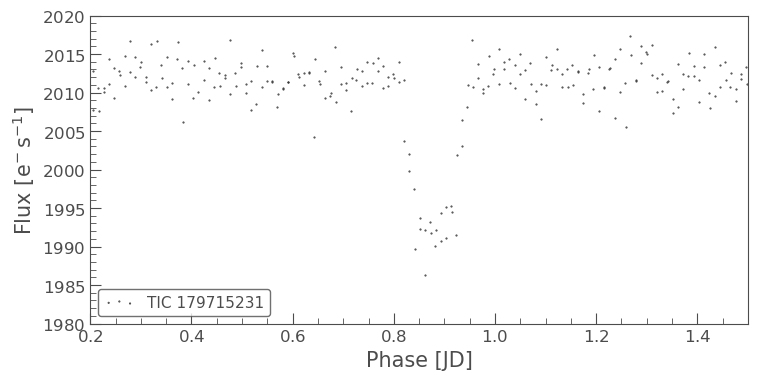

In [34]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue= 4.322631226312263486
epochtime = 2458604.576167
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=1)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(0.2,1.5)
plt.ylim([1980,2020])

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(1980.0, 2020.0)

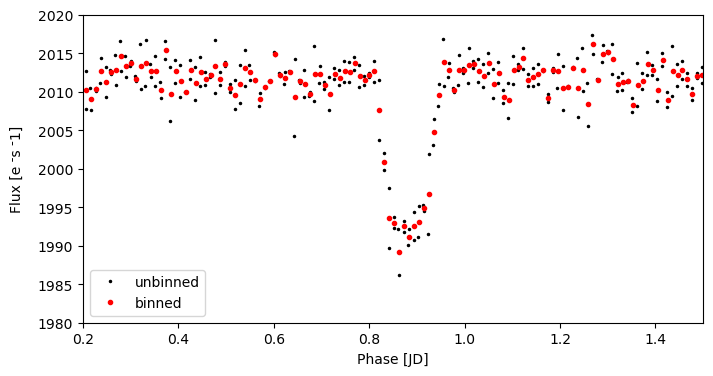

In [35]:
period  = periodvalue
t0 = epochtime 

folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(0.2,1.5)
plt.ylim([1980,2020])

In [36]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  1989.22021484375 electron / s
median flux = 2011.7554321289062 electron / s
Tdepth =  22.53521728515625 electron / s
Tdepth in ppm =  22535217.28515625 electron / s ppm
Rp/Rs ratio =  4.747127266585156 electron(1/2) / s(1/2)


In [37]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [38]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 2.4000000000000004 d hours


In [39]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  18.03635568645828 electron / s
depth in ppm = 18036355.68645828 electron / s ppm


In [40]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

4.322335223352234 d
1604.5761673086345
0.1 d


In [41]:
P = 4.322631226312263486 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 1.04 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 7871078347.357017 m
a = 7871078.347357017 km
a = 0.0526149079967242 AU
The planetary mass was neglected


In [42]:
L = 1.56934 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 1.1944340615005615 AU
The outer boundary of the habitable zone ro = 1.7207611304084387 AU


In [43]:
Rs = 1.24797 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 4125307.853377732 electron(1/2) / s(1/2) km
Rp= 647.5133971712027 electron(1/2) / s(1/2) Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 9.057508425600936


In [44]:
P = 4.322631226312263486 * 24 * 60 * 60
pi = math.pi
a = 5388848826.434916 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 90659.6295070343 m/s


In [45]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  4.322335223352234 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  2.4000000000000004 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  22.53521728515625 electron / s
Transit depth in ppm =  22535217.28515625 electron / s ppm
Transit Depth from bls model in ppm = 18036355.68645828 electron / s ppm
Rp/Rs ratio =  4.747127266585156 electron(1/2) / s(1/2)
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 4125307.853377732 electron(1/2) / s(1/2) km
Rp= 647.5133971712027 electron(1/2) / s(1/2) Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 5388848826.434916 m
a = 5388848.826434916 km
a = 0.036022228810152095 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 9.057508425600936
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 90659.6295070343 m/s
- - - - - - - - - - - - - - - - - - - - 


In [46]:
lk.show_citation_instructions()

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:545: LightkurveWarning: interact_sky() - cannot obtain nearby TICs. Skip it. The error: not enough values to unpack (expected 3, got 2)
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:631: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  warnings.warn(("Proper motion correction cannot be applied to the target, as none is available. "
